# Init Connection

In [7]:
import pandas as pd
from SharepointFunctions import SharepointFunctions as SF

In [2]:
#read file
import getpass
username = 'uid98421@vitesco.com' # <-- input username
password = getpass.getpass()

In [3]:
# connect to Controlling VT Korea Sharepoint
sharepoint_url = "https://vitesco.sharepoint.com/teams/team_10016532/" # Controlling VT Korea
sp = SF(username, password, sharepoint_url)

Connected to SharePoint:  Controlling VT Korea


# File Operations

In [4]:
# list files in sharepoint folder

folder_url ='Shared Documents' 
file_list = sp.get_filelist_sharepoint(folder_url)
for file in file_list:    
    print(file.properties["Name"]) 
    

subfolder_list = sp.get_filelist_sharepoint(folder_url)
for subfolder in subfolder_list:    
    print(subfolder.properties["Name"]) 

120.DAT
Jour-fixe list enty_automatic.xlsx
sharepoint.xlsx
120.DAT
Jour-fixe list enty_automatic.xlsx
sharepoint.xlsx


In [23]:
#read file from sharepoint
#show properties
print(file_list[1].properties)
file_url= '/teams/team_10016532/Shared Documents/090. Projects, Digital Controlling/Stickman with letter.jpg'
file_data = sp.read_file_sharepoint(file_url)

{'CheckInComment': '', 'CheckOutType': 2, 'ContentTag': '{59B40806-49E8-4E16-9015-C1CFA92E9644},5,17', 'CustomizedPageStatus': 0, 'ETag': '"{59B40806-49E8-4E16-9015-C1CFA92E9644},5"', 'Exists': True, 'ExistsAllowThrowForPolicyFailures': True, 'IrmEnabled': False, 'Length': '14941', 'Level': 1, 'LinkingUri': 'https://vitesco.sharepoint.com/teams/team_10016532/Shared%20Documents/Jour-fixe%20list%20enty_automatic.xlsx?d=w59b4080649e84e169015c1cfa92e9644', 'LinkingUrl': 'https://vitesco.sharepoint.com/teams/team_10016532/Shared Documents/Jour-fixe list enty_automatic.xlsx?d=w59b4080649e84e169015c1cfa92e9644', 'MajorVersion': 2, 'MinorVersion': 0, 'Name': 'Jour-fixe list enty_automatic.xlsx', 'ServerRelativeUrl': '/teams/team_10016532/Shared Documents/Jour-fixe list enty_automatic.xlsx', 'TimeCreated': '2023-06-07T07:46:26Z', 'TimeLastModified': '2023-06-07T07:48:06Z', 'Title': '', 'UIVersion': 1024, 'UIVersionLabel': '2.0', 'UniqueId': '59b40806-49e8-4e16-9015-c1cfa92e9644'}


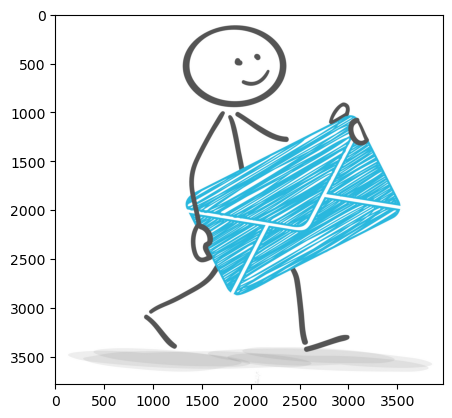

In [24]:
# visulize content
from matplotlib import pyplot as plt
from io import BytesIO
img = plt.imread(BytesIO(file_data),format='JPG')
plt.imshow(img)

In [25]:
# write content from sharepoint to local folder
sp.write_file_local(file_data,'./test.jpg')

In [26]:
# read file from local
file_data = sp.read_file_local('./test.jpg')

In [27]:
ctx = sp.get_sharepoint_connection()

In [28]:
# write file to local
sp.write_file_local(file_data,'./test2.jpg')

In [30]:
file_url= '/teams/team_10016532/Shared Documents/090. Projects, Digital Controlling/test.jpg'

In [31]:
# write file to sharepoint
sp.write_file_sharepoint(file_data,file_url)

File has been uploaded to url: /teams/team_10016532/Shared Documents/090. Projects, Digital Controlling/test.jpg


In [32]:
sp.delete_file_sharepoint(file_url)

File has been delete: /teams/team_10016532/Shared Documents/090. Projects, Digital Controlling/test.jpg


# List Operations

## List Demo

In [15]:
# read list into Pandas DataFrame
df = sp.read_list_sharepoint('Lists/Link Sharing')
# df = sp.read_list_sharepoint('Lists/Digital Finance  Standard activities')
# df = sp.read_list_sharepoint('Lists/2021 Meeting minutes  Jour fixe FSC Controlling  I')

In [16]:
df.head()

,FileSystemObjectType,Id,ServerRedirectedEmbedUri,ServerRedirectedEmbedUrl,ID,ContentTypeId,Title,Modified,Created,AuthorId,...,Description,Link,UploaderId,UploaderStringId,ChannelResponsibleId,ChannelResponsibleStringId,Validation,Ch,Typ,OData__ColorTag
0,0,1,None,,1,0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775...,eSign,2021-12-30T06:06:04Z,2021-12-15T05:41:30Z,40,...,eSign,{'Description': 'https://esign.vitesco-technol...,NaN,None,NaN,None,True,{0: '010. Common'},Web,None
1,0,2,None,,2,0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775...,GRC,2021-12-30T06:06:06Z,2021-12-15T06:02:48Z,40,...,GRC,{'Description': 'https://grc.vitesco-technolog...,NaN,None,NaN,None,True,{0: '010. Common'},Web,None
2,0,3,None,,3,0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775...,myCareer,2021-12-15T14:52:20Z,2021-12-15T06:04:53Z,40,...,myCareer,{'Description': 'https://performancemanager.su...,NaN,None,NaN,None,True,{0: '010. Common'},Web,None
3,0,4,None,,4,0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775...,Brand Portal,2021-12-15T14:52:26Z,2021-12-15T06:06:48Z,40,...,Vitesco Technologies Brand Portal,{'Description': 'https://brandportal.vitesco-t...,NaN,None,NaN,None,True,{0: '010. Common'},Web,None
4,0,5,None,,5,0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775...,L.E.A.N,2022-03-31T01:14:57Z,2021-12-15T06:18:21Z,40,...,L.E.A.N inVite Communtiy,{'Description': 'https://invite.vitesco-techno...,NaN,None,NaN,None,True,{0: '010. Common'},inVite,None


In [8]:
# write DataFrame into List
# ensure that the columnnames are matching
content = [{'Title': 'added item 1', 'myTextColumn': 'nice number', 'myNumericColumn': 3.14159},
           {'Title': 'added item 2', 'myTextColumn': 'even better number', 'myNumericColumn': 2.71828}
           ]

df_new = pd.DataFrame(content)
df_new

,Title,myTextColumn,myNumericColumn
0,added item 1,nice number,3.14159
1,added item 2,even better number,2.71828


In [33]:
sp.add_item_list_sharepoint('Lists/Link Sharing',df_new)

{'Title': 'added item 1', 'myTextColumn': 'nice number', 'myNumericColumn': 3.14159}
{'Title': 'added item 2', 'myTextColumn': 'even better number', 'myNumericColumn': 2.71828}


## List Testing

In [9]:
# conda install pandas 
# conda install pyarrow
import pandas as pd
import json
ctx = sp.get_sharepoint_connection()

In [10]:
# connect to list
list = ctx.web.get_list('/Lists/Link Sharing')
ctx.load(list)
ctx.execute_query()
list.properties['Title']

'Link Sharing'

In [11]:
#add row
content = {"Title":"0","myTextColumn":"hello world","myNumericColumn": 98765}
list.add_item(content).execute_query()

NameError: name 'lists' is not defined

In [12]:
#get all filed properties
fields = list.fields.get_all().execute_query()
content_array = []
for field in fields:
    content_array.append(field.properties)
df_fields = pd.DataFrame(content_array)
df_fields['Title']

0                   ID
1      Content Type ID
2         Content Type
3                Title
4             Modified
            ...       
84                Name
85           File Name
86    Item is a Record
87    Comment settings
88       Comment count
Name: Title, Length: 89, dtype: object

In [13]:
items = list.get_items().get_all().execute_query()
df = pd.DataFrame(items.to_json())

In [14]:
items[0].properties

{'FileSystemObjectType': 0,
 'Id': 1,
 'ServerRedirectedEmbedUri': None,
 'ServerRedirectedEmbedUrl': '',
 'ID': 1,
 'ContentTypeId': '0x0100A97AD3E397EB3749AB1DA81B8F013A1A00A58775463221E847988721E3D571036E',
 'Title': 'eSign',
 'Modified': '2021-12-30T06:06:04Z',
 'Created': '2021-12-15T05:41:30Z',
 'AuthorId': 40,
 'EditorId': 40,
 'OData__UIVersionString': '14.0',
 'Attachments': False,
 'GUID': 'be2bdc15-c8b9-4b0a-8aaa-5d1761d3fff5',
 'ComplianceAssetId': None,
 'Description': 'eSign',
 'Link': {'Description': 'https://esign.vitesco-technologies.net/',
  'Url': 'https://esign.vitesco-technologies.net/'},
 'UploaderId': None,
 'UploaderStringId': None,
 'ChannelResponsibleId': None,
 'ChannelResponsibleStringId': None,
 'Validation': True,
 'Ch': {0: '010. Common'},
 'Typ': 'Web',
 'OData__ColorTag': None}